# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [1]:
# your answer here
import pandas as pd
import numpy as np



# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [2]:
# your answer here
employee = pd.read_csv("./Employee.csv")
employee.head(50)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with groupby and the other way is with pivot tables. Do it both ways. 


In [3]:
# Method 1
# your answer here
employee.groupby("Department").agg({"Salary": "mean"})


,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [4]:
# Method 2
# your answer here
employee.pivot_table(index= ['Department'])#mean is default choice


,Salary,Years
Department,,
HR,45.00,4.666667
IT,48.75,4.500000
Sales,55.00,2.500000


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [5]:
# your answer here
employee.pivot_table(index= ["Department","Title"], values = ["Salary"])#mean is default choice

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [6]:
# your answer here
employee.pivot_table(index= ["Department","Title"], values = ["Salary","Years"])#mean is default choice

Salary  Years
Department Title                   
HR         VP           70.0    8.0
           analyst      32.5    3.0
IT         VP           70.0    8.0
           analyst      32.5    1.5
           associate    60.0    7.0
Sales      associate    55.0    2.5

#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [7]:
# your answer here
#having the count of employee by name
employee.pivot_table(index= ["Department","Title"], values = ["Salary","Years","Name"], aggfunc=({"Salary":"mean","Years":"mean","Name":"count"}))

Name  Salary  Years
Department Title                         
HR         VP            1    70.0    8.0
           analyst       2    32.5    3.0
IT         VP            1    70.0    8.0
           analyst       2    32.5    1.5
           associate     1    60.0    7.0
Sales      associate     2    55.0    2.5

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [8]:
# your answer here
employee.pivot_table(index= ["Department","Title"], values = ["Salary"], aggfunc=["mean","median","min", "max", "std"])
#no stdev for unique values

mean median    min    max       std
                     Salary Salary Salary Salary    Salary
Department Title                                          
HR         VP          70.0   70.0     70     70       NaN
           analyst     32.5   32.5     30     35  3.535534
IT         VP          70.0   70.0     70     70       NaN
           analyst     32.5   32.5     30     35  3.535534
           associate   60.0   60.0     60     60       NaN
Sales      associate   55.0   55.0     55     55  0.000000

#### Based on your comments, fill the missing values with an appropriate value.

In [9]:
# your answer here. filling na with 0 as there is no stdev with unique values
employee.pivot_table(index= ["Department","Title"], values = ["Salary"], aggfunc=["mean","median","min", "max", "std"]).fillna(0)

mean median    min    max       std
                     Salary Salary Salary Salary    Salary
Department Title                                          
HR         VP          70.0   70.0     70     70  0.000000
           analyst     32.5   32.5     30     35  3.535534
IT         VP          70.0   70.0     70     70  0.000000
           analyst     32.5   32.5     30     35  3.535534
           associate   60.0   60.0     60     60  0.000000
Sales      associate   55.0   55.0     55     55  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [10]:
# your answer here
employee
employee.pivot_table(index= ["Department"], values = ["Salary", "Name"], aggfunc = ({"Salary" :"sum", "Name":"count"}))

,Name,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [11]:
# your answer here
employee
employee.pivot_table(index= ["Department","Title"], values = ["Salary","Years"], aggfunc = ({"Salary":"mean", "Years": "sum"}))

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [5]:
# your answer here

employee.groupby("Department").agg({"Salary":lambda x: (x.sum()-x.max()).mean()})


                                

,Salary
Department,
HR,65
IT,125
Sales,55


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [13]:
# your answer here
fitbit = pd.read_csv("./Fitbit.csv")

#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [14]:
# your answer here
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


In [ ]:
# your answer here


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [15]:
# your answer here
x = fitbit['Steps']
y = fitbit['Minutes Very Active']

x.corr(y)

0.5714518481062607

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

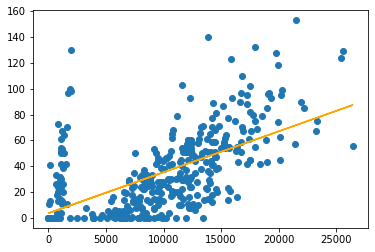

In [16]:
import matplotlib.pyplot as plt
from scipy import stats
#plt.scatter(x=fitbit['Steps'], y=fitbit['Minutes Very Active'])
results = stats.linregress(x,y)

regression_line = results.slope*x + results.intercept
plt.plot(x, regression_line, c = 'orange')
plt.scatter(x,y)
plt.show()

#### What can you say about Minute Very Active and Steps? Write a comment below

In [17]:
# your answer here
#seems correlated, except in the low values of x where behaviour of y is very different

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [18]:
# your answer here
x = fitbit['Steps']
y = fitbit['Minutes Sedentary']

x.corr(y)

0.0769060806299009

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

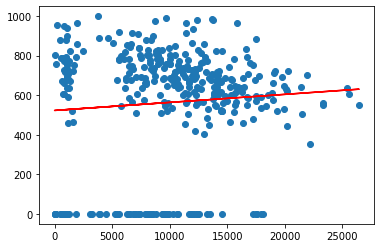

In [19]:
# your answer here
results = stats.linregress(x,y)

regression_line = results.slope*x + results.intercept
plt.plot(x, regression_line, c = 'red')
plt.scatter(x,y)
plt.show()

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [20]:
# your answer here
x = fitbit['Steps']
y = fitbit['MinutesOfSleep']

x.corr(y)

0.13098565950836386

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

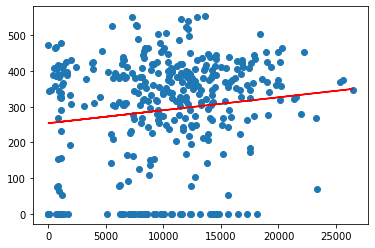

In [21]:
# your answer here
results = stats.linregress(x,y)

regression_line = results.slope*x + results.intercept
plt.plot(x, regression_line, c = 'red')
plt.scatter(x,y)
plt.show()
#not very much correlated

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [25]:
# your answer here
fitbit[['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']].corr()


,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [ ]:
# your answer here
#minutes very active and steps. 

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [26]:
# your answer here
time_grades = pd.read_csv("./Time_Grades.csv")

#### Show visually the frequency distribution of the time_grades dataset.

<function matplotlib.pyplot.show(close=None, block=None)>

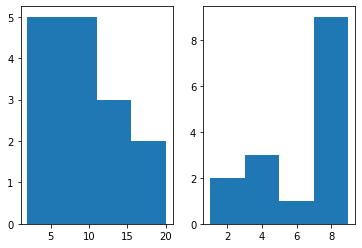

In [29]:
# your answer here
time_grades
fig, [a,b,]= plt.subplots(1,2)
a.hist(time_grades["Study time"], 4)
b.hist(time_grades["Grade"], 4)
plt.show

#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [38]:
# your answer here
spear = time_grades.corr(method='spearman')
pears = time_grades.corr(method= "pearson")
print(spear,"\n\n", pears)

            Study time     Grade
Study time    1.000000  0.819659
Grade         0.819659  1.000000 

             Study time     Grade
Study time    1.000000  0.798046
Grade         0.798046  1.000000


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

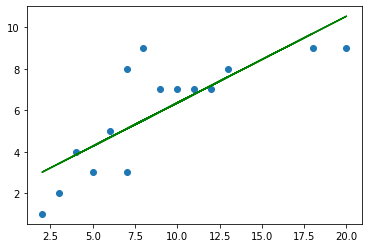

In [31]:
# your answer here
x = time_grades['Study time']
y = time_grades['Grade']


results = stats.linregress(x,y)

regression_line = results.slope*x + results.intercept
plt.plot(x, regression_line, c = 'green')
plt.scatter(x,y)
plt.show()

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [ ]:
# your answer here
#the correlation between study time and grade is very linear and spearman measures linear correlation. Pearsman is more adapted
# in non linear relationship even if here both gives a very strong correlation between both variables